In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib

In [2]:
# Setting size to our figures
matplotlib.rcParams['figure.figsize'] = (10, 8)

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Delay': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3 ], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Delay', ylabel='Age'>

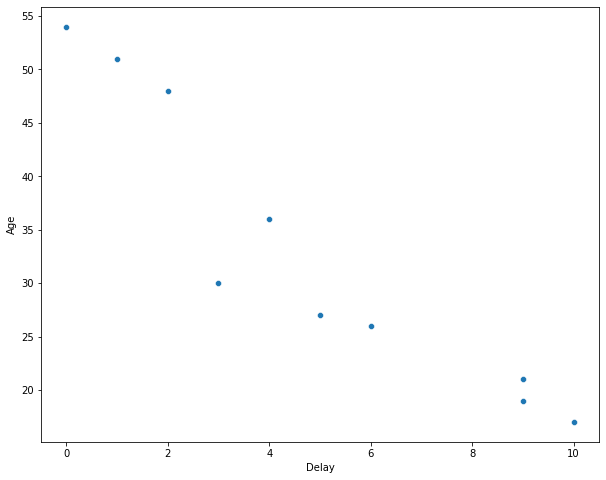

In [4]:
# Your code here.

sns.scatterplot(x="Delay", y="Age", marker='o', data=student_data)
    

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### it seems there´s a negative relation relation between delay and age. The older you are, the sooner you arrive to class.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
print(f"Covariance : {student_data.cov()}")
print(f"Correlation : {student_data.corr()}")

Covariance :            Delay         Age
Delay  12.544444  -45.566667
Age   -45.566667  187.655556
Correlation :           Delay       Age
Delay  1.000000 -0.939163
Age   -0.939163  1.000000


In [6]:
student_data.cov()

,Delay,Age
Delay,12.544444,-45.566667
Age,-45.566667,187.655556


**Covariance:** is a measure of correlation. Indicates the **direction** of the linear relationship between 2 variables. Measures on average the **real quantity** of this covariance. It is **affected by the changes in scale of its variables.** Thus varies from -∞ to ∞. 

**Correlation:** it´s the **scaled form of covariance**. Measures **both: strength and direction** of the linear rrelationship between 2 variables. Measures on averge the **proportion** of this variance between varables. **Not affected by changes in scale**. That is why it ranges between -1 and 1

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# First we create a class of our predictive model with the inbuilt function LinearRegression (from sklearn lib):
lr = LinearRegression()

In [8]:
y= student_data.Delay
X = student_data.Age.to_frame()

In [9]:
#Remarks: X va en mayuscula y pasarlo a to_frame pq sino no lo recibe en una serie
# we fit our variables and this gives us our estimated/predicted variables:
lr.fit(X, y)
coef_slope = lr.coef_[0]
intercept = lr.intercept_

In [10]:
#estimated coef and intercept which we can then compute in our predictive regression model (=^B0 + ^B1X)
coef_slope, intercept

(-0.2428207709159809, 12.888803363135771)

**intercept=** you are 50 yrs old if you dont arrive late (X=0)

**coef_slope=** with one unit of X (=delay), you have -3.6 years.  

Plot your regression model on your scatter plot.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Delay'>

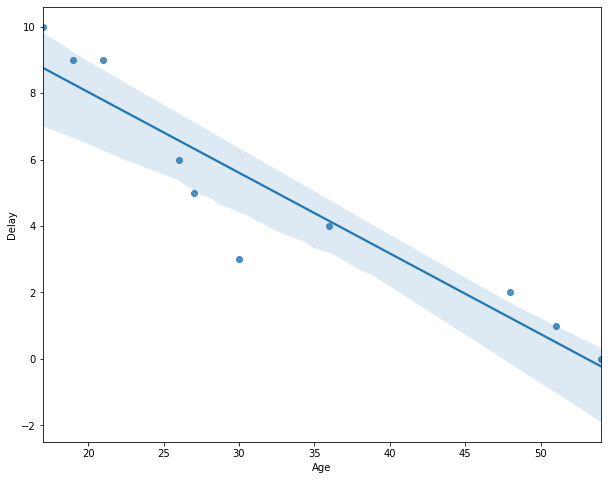

In [11]:
sns.regplot(X, y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

### Challenging our Model: finding the R**2 which measures how good our RM is. The higher the better: 

In [12]:
y_predicted = intercept + coef_slope*student_data.Age 

In [13]:
mean_prediction = [student_data.Delay.mean()] * 10

In [14]:
# Compare our Model with the Baseline Model: predicts the mean Y value for every entry:
TSS = ((student_data.Delay - mean_prediction) ** 2).sum()

In [15]:
 RSS = ((student_data.Delay - y_predicted) ** 2).sum()

In [16]:
r2 = (TSS-RSS)/TSS
r2

0.8820265558250109

**High R^2 means they do have a high, negative correlation**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [17]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [18]:
co2 = pd.DataFrame(vehicles[["CO2 Emission Grams/Mile","Year", "Cylinders", "Combined MPG",  "Fuel Barrels/Year", "Fuel Cost/Year" ]])

In [19]:
# Vemos como de limpia esta nuestro DF
co2.isnull().sum()

CO2 Emission Grams/Mile    0
Year                       0
Cylinders                  0
Combined MPG               0
Fuel Barrels/Year          0
Fuel Cost/Year             0
dtype: int64

In [20]:
co2.columns = co2.columns.str.replace(" ", "_").str.replace("/", "_per_")

<AxesSubplot:>

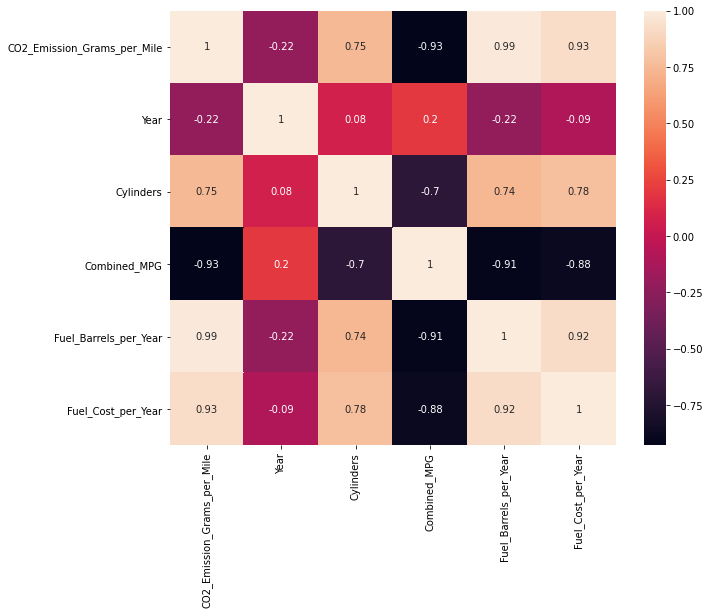

In [21]:
co2_correlation = co2.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=co2_correlation, annot=True)

In [22]:
co2.head()

,CO2_Emission_Grams_per_Mile,Year,Cylinders,Combined_MPG,Fuel_Barrels_per_Year,Fuel_Cost_per_Year
0,522.764706,1984,4.0,17,19.388824,1950
1,683.615385,1984,6.0,13,25.354615,2550
2,555.437500,1985,4.0,16,20.600625,2100
3,683.615385,1985,6.0,13,25.354615,2550
4,555.437500,1987,6.0,16,20.600625,2550


All of them have a lot of correlation (except Year):

**positive:** Fuel Barrels/Year, Fuel Cost/Year 

**negative:** combined MPG (the more fuel efficient a car, is the less it pollutes) and Year (which is probably not going to be representative)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

### Let´s take the variables who´s correlation > 0.90

In [23]:
# Your response here. 
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Combined_MPG + Fuel_Cost_per_Year ', data=co2).fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.980
Model:                                     OLS   Adj. R-squared:                  0.980
Method:                          Least Squares   F-statistic:                 5.932e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 22:48:37   Log-Likelihood:            -1.5235e+05
No. Observations:                        35952   AIC:                         3.047e+05
Df Residuals:                            35948   BIC:                         3.047e+05
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel_Barrels_per_Year    19.6955      0.059    331.484      0.000      19.579      19.812
Combined_MPG             -3.1661      0.043    -73.626      0.000      -3.250      -3.082
Fuel_Cost_per_Year        0.0317      0.000     70.466      0.000       0.031       0.033
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

##### We have an iincredibly high R^2: out of the three, fuel cost/year is by far the least strong relation as with one value of it, co2 emissions increases by 0.03. So lets remove it and see what happens:

In [25]:
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Combined_MPG ', data=co2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.977
Model:                                     OLS   Adj. R-squared:                  0.977
Method:                          Least Squares   F-statistic:                 7.796e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 22:48:39   Log-Likelihood:            -1.5467e+05
No. Observations:                        35952   AIC:                         3.094e+05
Df Residuals:                            35949   BIC:                         3.094e+05
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               162.6698      1.742     93.379      0.000     159.255     166.084
Fuel_Barrels_per_Year    22.1971      0.051    436.726      0.000      22.098      22.297
Combined_MPG             -3.9251      0.044    -88.378      0.000      -4.012      -3.838
==============================================================================
Omnibus:                    79355.158   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        473547972.462
Skew:                          20.487   Prob(JB):                         0.00
Kurtosis:                     563.751   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Clearly we need fuel/cost, lets now add cylinders:

In [26]:
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Combined_MPG + Cylinders + Fuel_Cost_per_Year', data=co2).fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.980
Model:                                     OLS   Adj. R-squared:                  0.980
Method:                          Least Squares   F-statistic:                 4.470e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 22:48:40   Log-Likelihood:            -1.5226e+05
No. Observations:                        35952   AIC:                         3.045e+05
Df Residuals:                            35947   BIC:                         3.046e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               131.1563      1.688     77.714      0.000     127.848     134.464
Fuel_Barrels_per_Year    19.6271      0.060    329.809      0.000      19.510      19.744
Combined_MPG             -3.1666      0.043    -73.810      0.000      -3.251      -3.082
Cylinders                 1.0448      0.080     12.993      0.000       0.887       1.202
Fuel_Cost_per_Year        0.0294      0.000     61.102      0.000       0.028       0.030
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## OJO!! el R^2 es el mismo, PERO el F-Statistic es mas bajo, lo que indica que hay menos multilinear relations. 
### Asi que el máximo es el primero, ahora vamos a ver si hay alguna sinergia entre esas variables. Y boom:

In [32]:
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year*Combined_MPG +Fuel_Barrels_per_Year*Fuel_Cost_per_Year +Fuel_Cost_per_Year*Combined_MPG ', data=co2).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.993
Model:                                     OLS   Adj. R-squared:                  0.993
Method:                          Least Squares   F-statistic:                 8.091e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 23:08:45   Log-Likelihood:            -1.3453e+05
No. Observations:                        35952   AIC:                         2.691e+05
Df Residuals:                            35945   BIC:                         2.691e+05
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  220.2960      2.518     87.474      0.000     215.360     225.232
Fuel_Barrels_per_Year                       15.0854      0.132    114.109      0.000      14.826      15.345
Combined_MPG                                 1.2808      0.058     21.981      0.000       1.167       1.395
Fuel_Barrels_per_Year:Combined_MPG          -0.0885      0.007    -13.326      0.000      -0.102      -0.076
Fuel_Cost_per_Year                           0.1776      0.001    129.768      0.000       0.175       0.180
Fuel_Barrels_per_Year:Fuel_Cost_per_Year    -0.0014   3.06e-05    -45.641      0.000      -0.001      -0.001
Fuel_Cost_per_Year:Combined_MPG             -0.0083   5.82e-05   -142.421      0.000      -0.008      -0.008
==============================================================================
Omnibus:                    35378.571   Durbin-Watson:                   0.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7286038.782
Skew:                           4.328   Prob(JB):                         0.00
Kurtosis:                      72.202   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 